# Loan Data Analysis Practical

This notebook performs all steps as per the given practical question.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from math import acos, degrees


In [2]:

# Load dataset
df = pd.read_csv("loan_data.csv")
df.head()


,Application_ID,Applicant_Name,Age,Gender,Income,Loan_Amount,Credit_Score,Employment_Status,Loan_Term_Months,Loan_Purpose,Approval_Status
0,LA001,John Smith,35,Male,55000,15000,720,Employed,36,Home Improvement,Approved
1,LA002,Sarah Johnson,28,Female,42000,8000,680,Employed,24,Debt Consolidation,Approved
2,LA003,Michael Brown,45,Male,78000,25000,750,Self-Employed,48,Business,Approved
3,LA004,Emily Davis,32,Female,38000,12000,590,Employed,36,Education,Rejected
4,LA005,David Wilson,52,Male,95000,50000,800,Employed,60,Home Purchase,Approved


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Application_ID     50 non-null     object
 1   Applicant_Name     50 non-null     object
 2   Age                50 non-null     int64 
 3   Gender             50 non-null     object
 4   Income             50 non-null     int64 
 5   Loan_Amount        50 non-null     int64 
 6   Credit_Score       50 non-null     int64 
 7   Employment_Status  50 non-null     object
 8   Loan_Term_Months   50 non-null     int64 
 9   Loan_Purpose       50 non-null     object
 10  Approval_Status    50 non-null     object
dtypes: int64(5), object(6)
memory usage: 4.4+ KB


In [4]:
df.describe()

,Age,Income,Loan_Amount,Credit_Score,Loan_Term_Months
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,37.320000,63880.000000,22760.000000,702.900000,36.960000
std,8.832778,23337.488454,17285.194797,68.928312,16.636522
min,24.000000,32000.000000,4000.000000,560.000000,12.000000
25%,30.000000,44500.000000,9125.000000,656.250000,24.000000
50%,35.500000,57000.000000,17000.000000,712.500000,36.000000
75%,44.750000,81000.000000,31500.000000,753.750000,48.000000
max,55.000000,120000.000000,75000.000000,820.000000,72.000000


## Step 1: Central Tendency & Dispersion

#### * find mean median mode

In [5]:

# Income statistics
mean_income = df["Income"].mean()
median_income = df["Income"].median()
mode_income = df["Income"].mode()[0]

print("mean: ", mean_income)
print("median: ",median_income)
print("mode: ",mode_income)


mean:  63880.0
median:  57000.0
mode:  35000


* loan amount dispersion

In [6]:

# Loan Amount dispersion
loan_range = df["Loan_Amount"].max() - df["Loan_Amount"].min()
loan_variance = df["Loan_Amount"].var()
loan_std = df["Loan_Amount"].std()

print("range: ",loan_range)
print("variance: ",loan_variance)
print("std: ",loan_std)


range:  71000
variance:  298777959.18367344
std:  17285.1947973887


## Step 2: Probability & Events

* compute probability of loan defoult

In [7]:

df["Default"] = df["Approval_Status"].apply(lambda x: 1 if x == "Rejected" else 0)
prob_default = df["Default"].mean()
print("probability of loan defoult: ",prob_default)


probability of loan defoult:  0.18


* create a contingency table between defoult score and credit score

In [8]:

bins = [300, 600, 700, 850]
labels = ["Low", "Medium", "High"]
df["Credit_Score_Range"] = pd.cut(df["Credit_Score"], bins=bins, labels=labels)

pd.crosstab(df["Default"], df["Credit_Score_Range"])


Credit_Score_Range,Low,Medium,High
Default,,,
0,0,14,27
1,6,3,0


* compute conditional probability 

In [9]:

low_credit = df[df["Credit_Score"] < 600]
low_credit["Default"].mean()
print(low_credit)


   Application_ID   Applicant_Name  Age  Gender  Income  Loan_Amount  \
3           LA004      Emily Davis   32  Female   38000        12000   
11          LA012   Melissa Harris   24  Female   32000         4000   
27          LA028      Megan Baker   26  Female   36000         4500   
37          LA038  Danielle Turner   27  Female   37000         5000   
43          LA044     Tiffany Reed   26  Female   35000         4000   

    Credit_Score Employment_Status  Loan_Term_Months Loan_Purpose  \
3            590          Employed                36    Education   
11           580          Employed                12    Education   
27           570          Employed                12     Vacation   
37           585          Employed                12     Vacation   
43           560          Employed                12      Medical   

   Approval_Status  Default Credit_Score_Range  
3         Rejected        1                Low  
11        Rejected        1                Low  
27   

### Step 3: Distributions & Visualization

* plot a histogram of credit score with gaussion curve

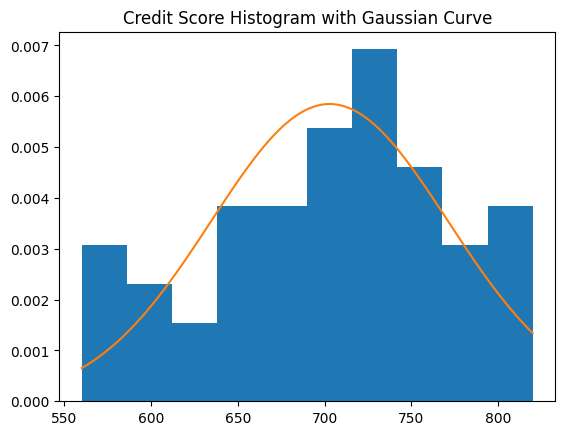

In [10]:

plt.figure()
data = df["Credit_Score"]
plt.hist(data, density=True)
mu, std = norm.fit(data)
x = np.linspace(data.min(), data.max(), 100)
plt.plot(x, norm.pdf(x, mu, std))
plt.title("Credit Score Histogram with Gaussian Curve")
plt.show()


* Find a skewness and Kurtosis

In [11]:

skewness = stats.skew(df["Loan_Amount"])
kurtosis = stats.kurtosis(df["Loan_Amount"])

print("skewness: ",skewness)
print("kurtosis: ",kurtosis)


skewness:  1.1469373366218114
kurtosis:  0.7327737915297465


* Drow Q-Q Plot for income column

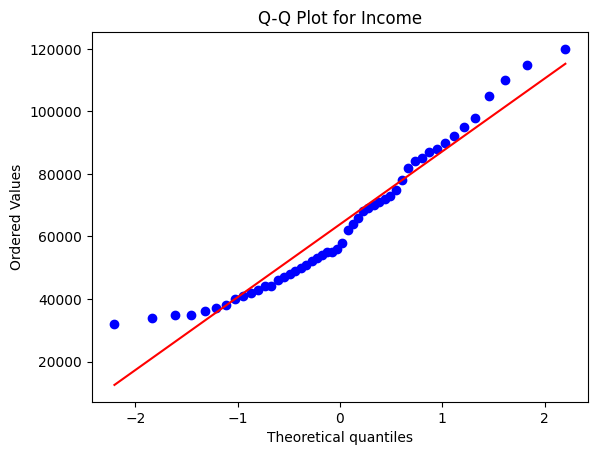

In [12]:

stats.probplot(df["Income"], plot=plt)
plt.title("Q-Q Plot for Income")
plt.show()


## Step 4: Linear Algebra Application

* perform dot product between two customar vector

In [13]:
vectors = df.loc[:4, ["Income", "Loan_Amount"]].values

In [14]:
v1 = vectors[0]
v2 = vectors[1]

dot_product = np.dot(v1, v2)

print("Dot product of two customar vector: ",dot_product)

Dot product of two customar vector:  2430000000


* Find a norm 2 of a customers finacail vectors

In [15]:
norm_v1 = np.linalg.norm(v1)

print("norm 1: ",norm_v1)

norm 1:  57008.7712549569


* Calculate the angle between two costumors vector

In [16]:
angle = degrees(acos(dot_product / (np.linalg.norm(v1) * np.linalg.norm(v2))))

print("Angle between two customers: ",angle)

Angle between two customers:  4.470820835495121
